<a href="https://colab.research.google.com/github/thanhthaooooo/DataAnalysis/blob/main/HotelBookingDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Xử lý dữ liệu**

Thực hiện theo các bước

1. Xóa các dữ liệu bị trùng lặp.
2. Xử lý các giá trị bị thiếu.
3. Chuyển đổi các cột thành kiểu dữ liệu thích hợp.
4. Xử lý ngoại lệ





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Đọc dữ liệu

In [ ]:
csv_file = '/hotel_bookings.csv'  # Đường dẫn đến tệp CSV của bạn
df = pd.read_csv(csv_file)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Bước 1: Loại các hàng dữ liệu trùng lặp**

In [ ]:
df[df.duplicated()].shape

(31994, 32)

In [ ]:
df.drop_duplicates(inplace = True)

**Bước 2: Xử lý giá trị bị thiếu**

In [ ]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [ ]:
null_sorted = null.sort_values(by='Null Values', ascending=False)
null_sorted

,Null Values,Percentage Null Values
company,82137,93.982562
agent,12193,13.951439
country,452,0.517186
children,4,0.004577
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


Biểu đồ giá trị thiếu

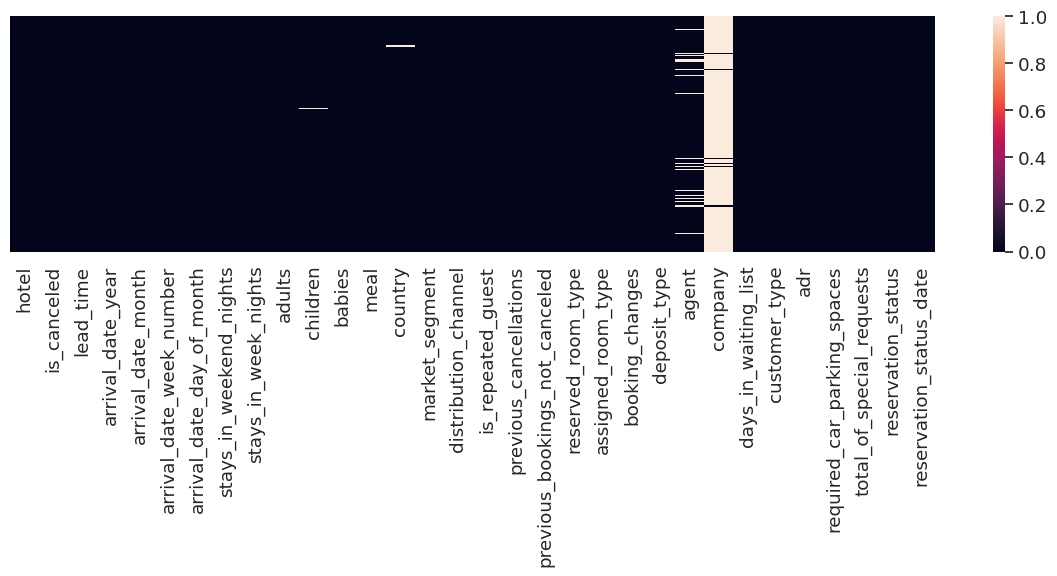

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), yticklabels=False)
plt.tight_layout()
plt.show()



Loại cột 'company'

In [ ]:
df = df.drop('company',axis =1)

Thay thế giá trị thiếu cột ' agent'

In [ ]:
df["agent"] = df["agent"].fillna(0)

Thay thế giá trị thiếu cột ' conutry' bằng giá trị có tần suất nhiều nhất

In [ ]:
df["country"].value_counts()

,count
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
...,...
MMR,1
BFA,1
CYM,1


In [ ]:
df["country"] = df["country"].fillna('PRT')

In [ ]:
df["children"] = df["children"].fillna(0)

**Bước 3: Chuyển đổi các cột thành kiểu dữ liệu thích hợp**

In [ ]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df[['agent','children']]=df[['agent','children']].astype('int')
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


**Bước 4: Xử lý ngoại lệ**

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,10.015731,55.013953,0.281533,0.831946,NaN


In [ ]:
df['is_canceled'] = df['is_canceled'].map({0: 'No', 1: 'Yes'})
df['is_repeated_guest'] = df['is_repeated_guest'].map({0: 'No', 1: 'Yes'})

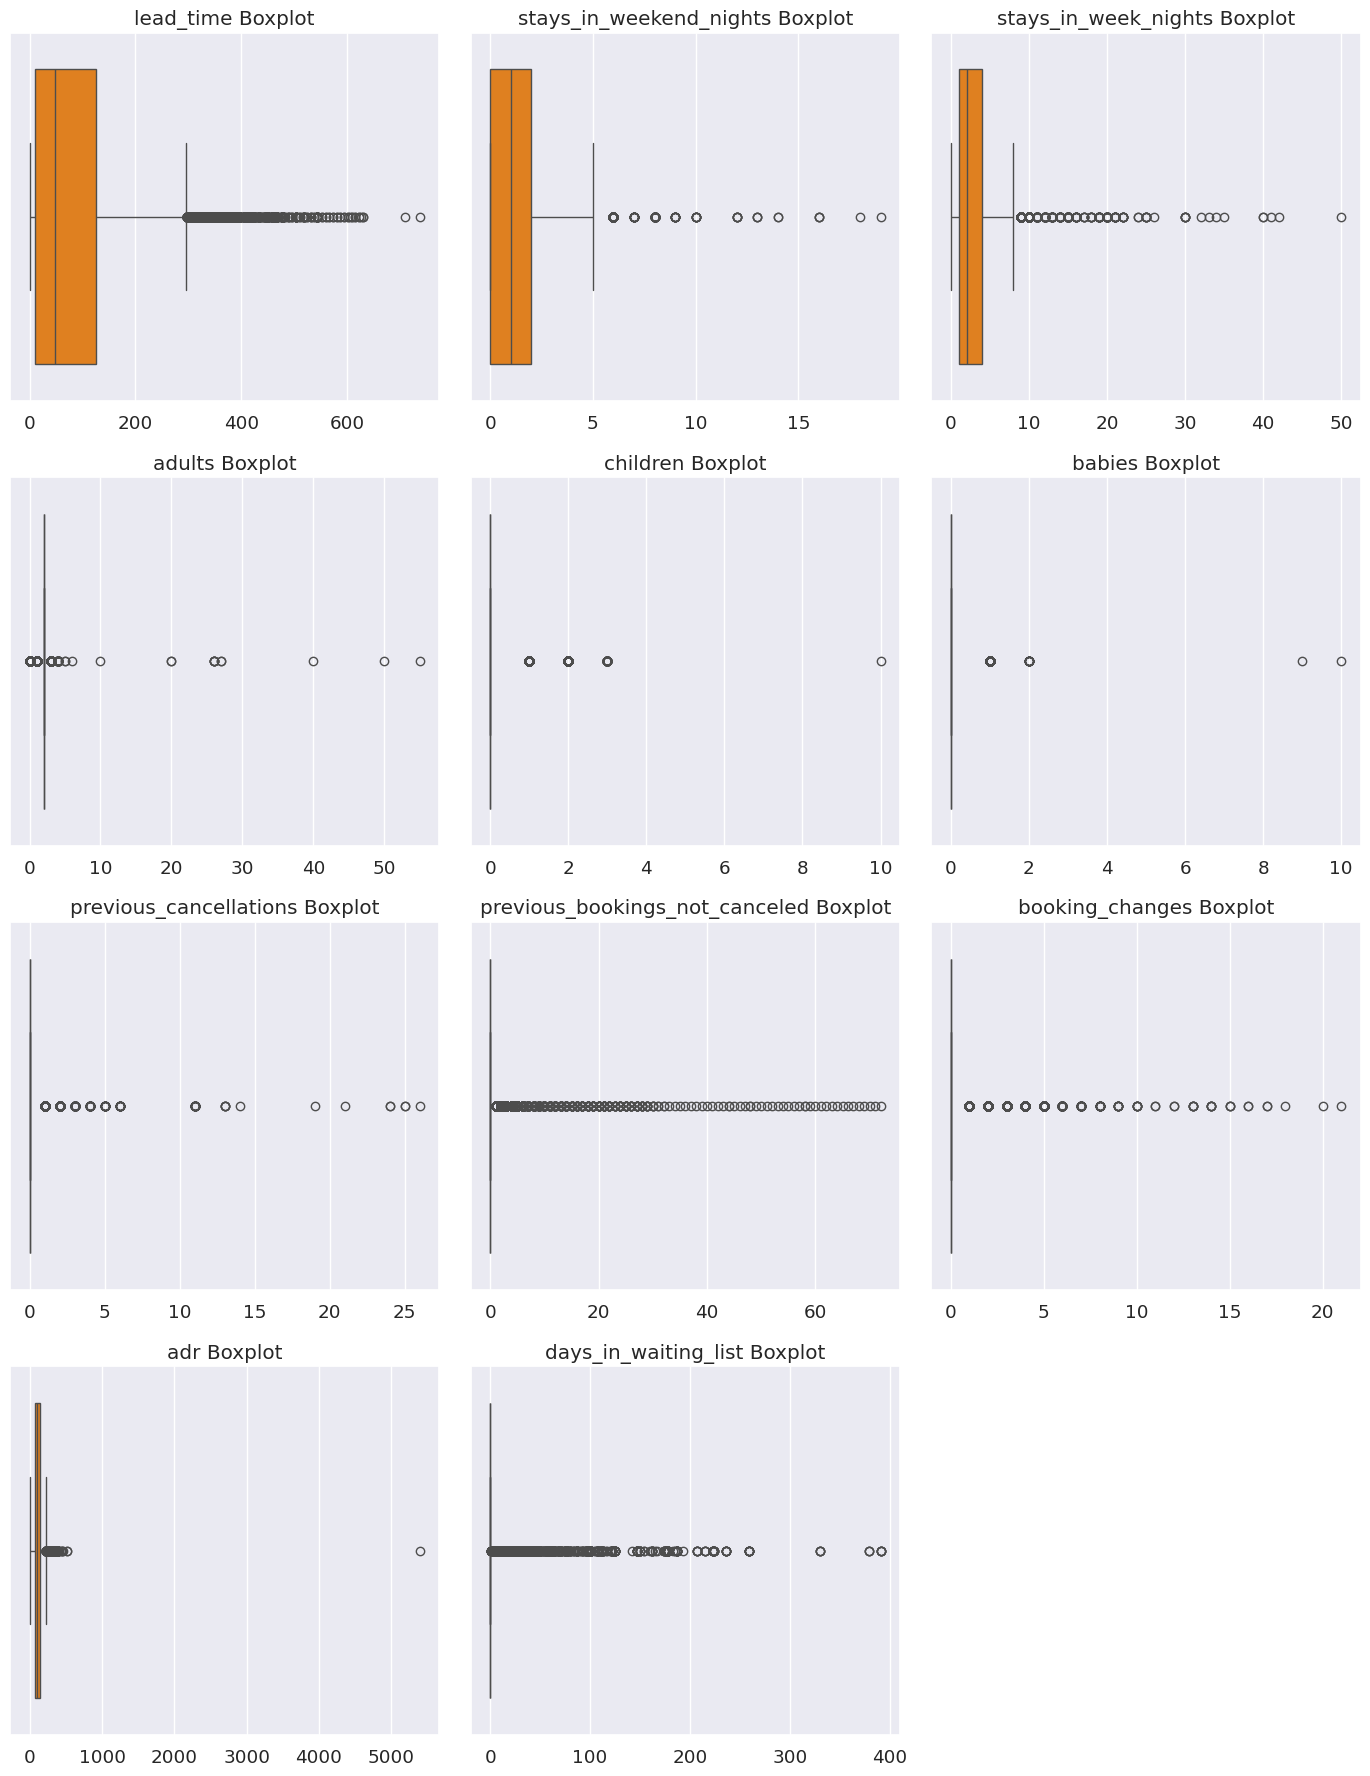

In [ ]:
# Define the list of features
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes', 'adr',
            'days_in_waiting_list']

# Set style and scale
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

# Create figure
plt.figure(figsize=(14, 18))

# Loop over the features and plot boxplots
for i, feature in enumerate(features):
    # Boxplot
    plt.subplot((len(features) // 3) + 1, 3, i + 1)
    sns.boxplot(x=df[feature], palette='autumn').set(xlabel=None)
    plt.title(f'{feature} Boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

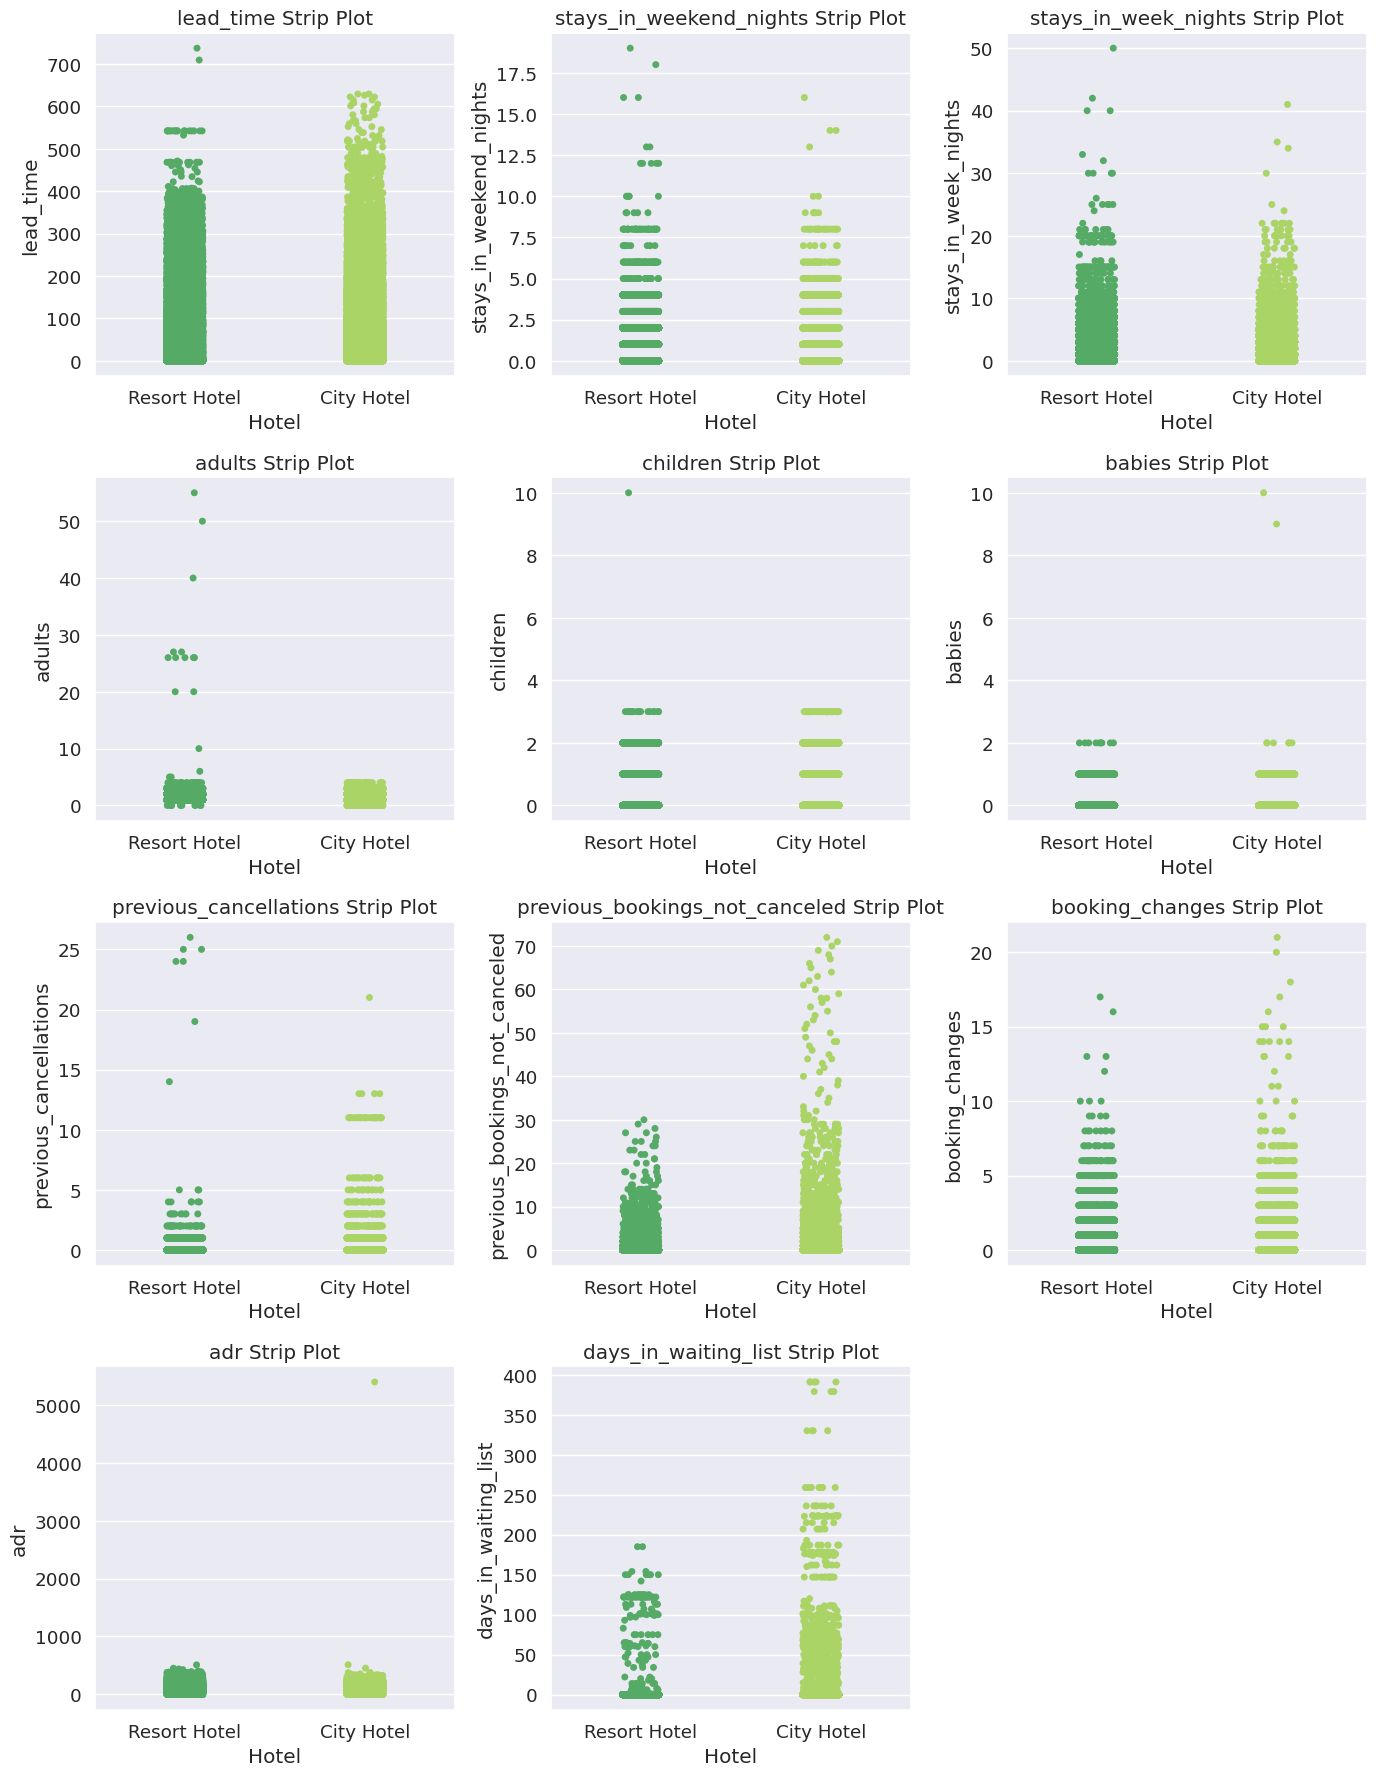

In [ ]:
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

# Set style and scale
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

# Create figure
plt.figure(figsize=(14, 18))

# Loop over the features and create stripplots
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)  # Adjust the subplot layout
    sns.stripplot(x='hotel', y=df[feature], data=df, palette='summer')
    plt.title(f'{feature} Strip Plot')
    plt.xlabel('Hotel')
    plt.ylabel(feature)

plt.tight_layout()


In [ ]:
df.drop(df[df['adr'] == 5400].index, inplace = True)
df.drop(df[df['adr'] == -6.38].index, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87394 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87394 non-null  object        
 1   is_canceled                     87394 non-null  object        
 2   lead_time                       87394 non-null  int64         
 3   arrival_date_year               87394 non-null  int64         
 4   arrival_date_month              87394 non-null  object        
 5   arrival_date_week_number        87394 non-null  int64         
 6   arrival_date_day_of_month       87394 non-null  int64         
 7   stays_in_weekend_nights         87394 non-null  int64         
 8   stays_in_week_nights            87394 non-null  int64         
 9   adults                          87394 non-null  int64         
 10  children                        87394 non-null  int64         
 11  babies

In [ ]:
selected_columns = ['lead_time','previous_bookings_not_canceled','previous_cancellations', 'booking_changes']
# Tính toán Q1, Q3 và IQR cho từng cột
Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Xác định các ngoại lệ (dưới Q1 - 1.5*IQR hoặc trên Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = (df[selected_columns] < lower_bound) | (df[selected_columns] > upper_bound)
outlier_indices = set(outliers[outliers.any(axis=1)].index)

In [ ]:
df = df.drop(index=outlier_indices)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66202 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           66202 non-null  object        
 1   is_canceled                     66202 non-null  object        
 2   lead_time                       66202 non-null  int64         
 3   arrival_date_year               66202 non-null  int64         
 4   arrival_date_month              66202 non-null  object        
 5   arrival_date_week_number        66202 non-null  int64         
 6   arrival_date_day_of_month       66202 non-null  int64         
 7   stays_in_weekend_nights         66202 non-null  int64         
 8   stays_in_week_nights            66202 non-null  int64         
 9   adults                          66202 non-null  int64         
 10  children                        66202 non-null  int64         
 11  babies

Thêm các cột

In [ ]:
total_stays_days = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['total_stays_days'] = total_stays_days

total_guest = df['adults'] + df['children'] + df['babies']
df['total_guest'] = total_guest

In [ ]:
df[df['total_guest'] == 0].shape
df.drop(df[df['total_guest'] == 0].index, inplace=True)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays_days,total_guest
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,304,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
6,Resort Hotel,No,0,2015,July,27,1,0,2,2,...,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2
7,Resort Hotel,No,9,2015,July,27,1,0,2,2,...,303,0,Transient,103.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,No,23,2017,August,35,30,2,5,2,...,394,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,No,102,2017,August,35,31,2,5,3,...,9,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,No,34,2017,August,35,31,2,5,2,...,9,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,No,109,2017,August,35,31,2,5,2,...,89,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [ ]:
df['family'] = ((df['children'] > 0) | (df['babies'] > 0)).map({True: 'Yes', False: 'No'})
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays_days,total_guest,family
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,No
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,No
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2,No
6,Resort Hotel,No,0,2015,July,27,1,0,2,2,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2,No
7,Resort Hotel,No,9,2015,July,27,1,0,2,2,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,No,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2,No
119386,City Hotel,No,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3,No
119387,City Hotel,No,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2,No
119388,City Hotel,No,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2,No


In [ ]:
# Define the list of features
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes', 'adr',
            'days_in_waiting_list']

# Set style and scale
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

# Create figure
plt.figure(figsize=(14, 18))

# Loop over the features and plot boxplots
for i, feature in enumerate(features):
    # Boxplot
    plt.subplot((len(features) // 3) + 1, 3, i + 1)
    sns.boxplot(x=df[feature], palette='autumn').set(xlabel=None)
    plt.title(f'{feature} Boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

NameError: name 'sns' is not defined